In [ ]:
!pip install --quiet --upgrade accelerate
!pip install git+https://github.com/huggingface/diffusers.git@main
!pip install controlnet_hinter==0.0.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.5 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers.git (to revision main) to /tmp/pip-req-build-tuykwcxm
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-tuykwcxm
  Resolved https://github.com/huggingface/diffusers.git to commit 2c25b98c8ea74cfb5ec56ba49cc6edafef0b26af
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-py3-none-any.whl size=2443626 sha256=624685f056a3b767d4e69c3e7efce2200e45cb961f7fee7a5aedb55d17a36442
  Stored in directory: /tmp/pip-ephem-wheel-cache-3yf43eqb/wheels/2f/e1/9c/c4e22972ee698b020d29ed7cc914d898247d01e302f25df1a4
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import controlnet_hinter

# Mapping for ControlNet Model path and hinter function

CONTROLNET_MAPPING = {
    # Various mappings...
    "canny_edge": {
        "model_id": "lllyasviel/sd-controlnet-canny",
        "hinter": controlnet_hinter.hint_canny
    },
   "pose": {
        "model_id": "lllyasviel/sd-controlnet-openpose",
        "hinter": controlnet_hinter.hint_openpose
    },
    # Other mappings...
}

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

device = "cuda"
controlnet_type = "canny_edge"

# Stable diffusion base model
base_model_path =  "digiplay/Juggernaut_final"

# Loading the base model with ControlNet
controlnet = ControlNetModel.from_pretrained(CONTROLNET_MAPPING[controlnet_type]["model_id"], torch_dtype=torch.float16).to(device)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
     base_model_path ,
     controlnet=controlnet,
     torch_dtype=torch.float16
    ).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/593 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/427 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

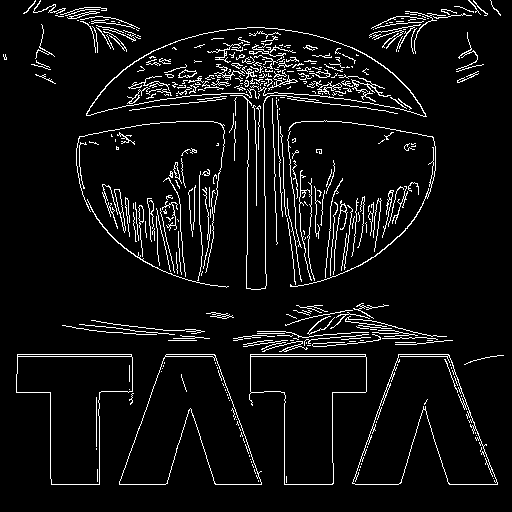

In [ ]:
import torch
from diffusers.utils import load_image

# Set your prompt, negative prompt, steps, and guidance scale
prompt = "Colorful, jungle surrounding, trees, natural, detailed, hd, 4k"
negative_prompt = "lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality"

no_of_steps = 20

# how much would the prompt affect the final output.
# higher guidance scale means more preference given to the prompt.
guidace_scale = 7.0

# how much final output would follow the control image
controlnet_conditioning_scale=1.0

# load pil image in logo_image variable
logo_image = load_image("2diffusion.jpeg")

# convert it into a control image based on the model
control_image = CONTROLNET_MAPPING[controlnet_type]["hinter"](logo_image )
# run the inference,
my_images = pipe(
    prompt=prompt,
    width=512,
    height=512,
    negative_prompt=negative_prompt,
    image=control_image,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=no_of_steps,
    guidance_scale=guidace_scale,
)

# get first image from the image generations object.
first_image = my_images.images[0]

# shows the generated control image
control_image

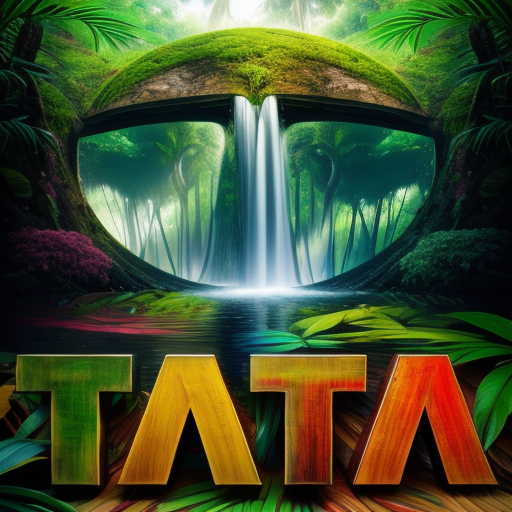

In [ ]:
first_image